In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("adult.csv")

# check how data looks by viewing the top five records in the data
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df2 = df.replace('?', float('nan'), inplace=False)

# Check missing values
df2.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [7]:
import numpy as np
df = df.replace('?', np.nan)

# Fill missing values with the most common value for categorical features
categorical_cols = ['workclass', 'occupation', 'native-country']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
df.describe().round(3)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000,48842.000,48842.000,48842.000,48842.000,48842.000
mean,38.644,189664.135,10.078,1079.068,87.502,40.422
std,13.711,105604.025,2.571,7452.019,403.005,12.391
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117550.500,9.000,0.000,0.000,40.000
50%,37.000,178144.500,10.000,0.000,0.000,40.000
75%,48.000,237642.000,12.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,4356.000,99.000


In [9]:
num_columns = df[["age","fnlwgt","educational-num","capital-gain","capital-loss","hours-per-week"]]
num_columns.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


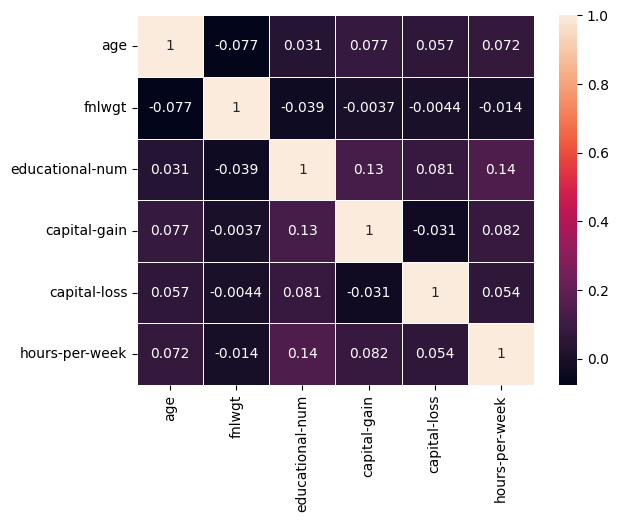

In [10]:
sns.heatmap(num_columns.corr(), annot=True, linewidth=0.5);

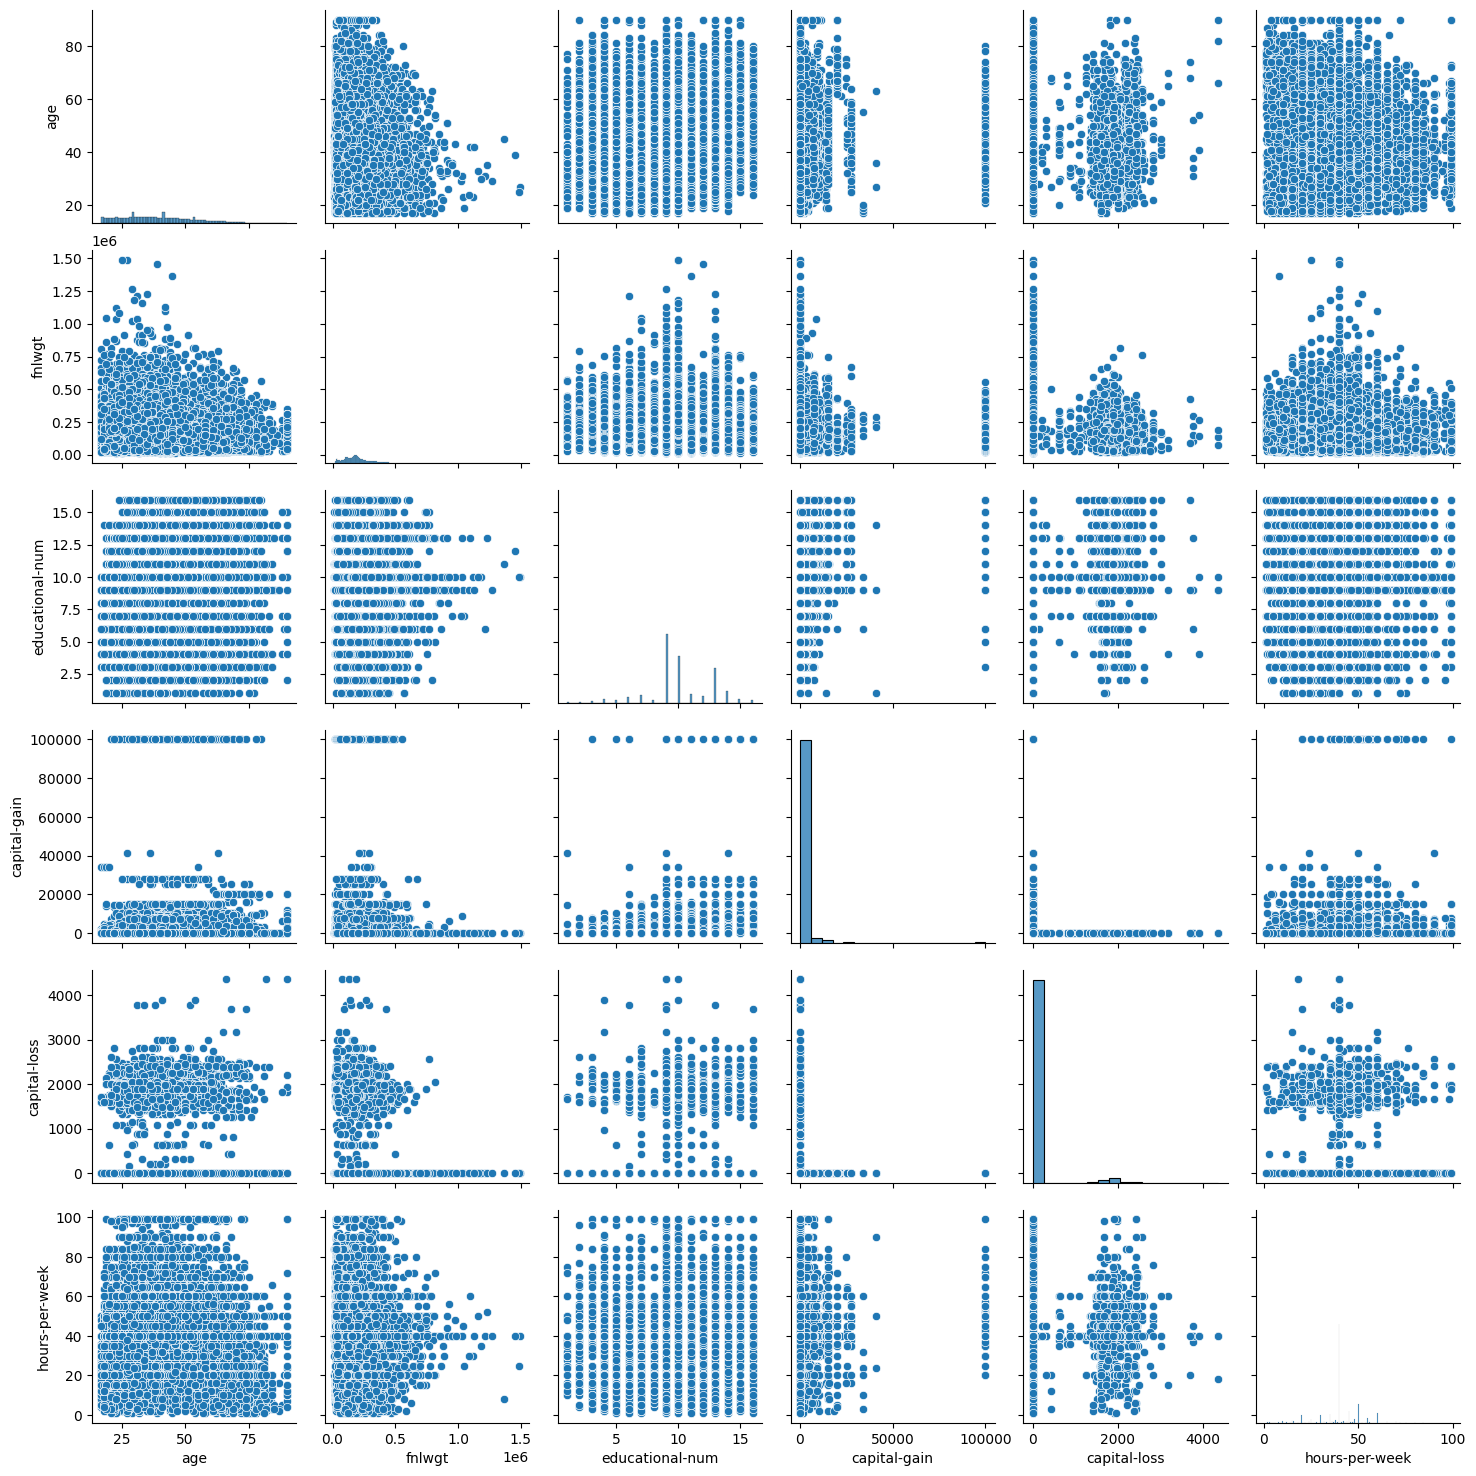

In [11]:
sns.pairplot(df)

In [13]:
df_classification_summary = df.groupby('income').describe().T.round(3)
df_classification_summary

income                       <=50K         >50K
age             count    37155.000    11687.000
                mean        36.872       44.275
                std         14.104       10.559
                min         17.000       19.000
                25%         25.000       36.000
                50%         34.000       43.000
                75%         46.000       51.000
                max         90.000       90.000
fnlwgt          count    37155.000    11687.000
                mean    190039.566   188470.575
                std     106577.605   102442.732
                min      12285.000    13769.000
                25%     117210.000   118942.500
                50%     178811.000   176729.000
                75%     238917.000   233505.000
                max    1490400.000  1226583.000
educational-num count    37155.000    11687.000
                mean         9.598       11.603
                std          2.438        2.383
                min          1.000        1.000
                25%          9.000       10.000
                50%          9.000       12.000
                75%         10.000       13.000
                max         16.000       16.000
capital-gain    count    37155.000    11687.000
                mean       147.010     4042.239
                std        936.754    14756.771
                min          0.000        0.000
                25%          0.000        0.000
                50%          0.000        0.000
                75%          0.000        0.000
                max      41310.000    99999.000
capital-loss    count    37155.000    11687.000
                mean        54.152      193.529
                std        313.320      593.212
                min          0.000        0.000
                25%          0.000        0.000
                50%          0.000        0.000
                75%          0.000        0.000
                max       4356.000     3683.000
hours-per-week  count    37155.000    11687.000
                mean        38.840       45.453
                std         12.357       11.091
                min          1.000        1.000
                25%         35.000       40.000
                50%         40.000       40.000
                75%         40.000       50.000
                max         99.000       99.000